In [1]:
%pip install matplotlib numpy
current_dir = %pwd

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
base_path = os.path.dirname(current_dir)

In [3]:
"""
Utility functions
"""

# --------------------------------------------------------------------------------------
# Get data from all participants and target distances
# Input: participants - list of participants
#        trial - trial name
#        target_dist - list of target distances
#        box - box name
#        base_path - base path
# Output: data_cm - dictionary of target distances and their corresponding data in cm
#         data_in - dictionary of target distances and their corresponding data in inches
# --------------------------------------------------------------------------------------
def get_data(participants, target_dist, trial, box, base_path):
    data_cm = {}
    data_in = {}
    for participant in participants:
        for dist in target_dist:
            data_path = os.path.join(base_path, f'data/2025.03.25_prelim/{participant}/{trial}/{dist}/{box}')
            for file in os.listdir(data_path):
                if file.endswith('.txt'):
                    # Load data
                    data = np.loadtxt(os.path.join(data_path, file), delimiter=',', skiprows=1)
                    
                    # Extract columns 1 and 2
                    min_dist_cm = data[:, 1]  
                    min_dist_in = data[:, 2]  
                    
                    # Append to target_dist_map
                    if dist in data_cm.keys():
                        data_cm[dist] = np.append(data_cm[dist], min_dist_cm)
                        data_in[dist] = np.append(data_in[dist], min_dist_in)
                    else:   
                        data_cm[dist] = min_dist_cm
                        data_in[dist] = min_dist_in
    return data_cm, data_in

# --------------------------------------------------------------------------------------
# Calculate mean and std of data points within z_score_threshold
# Return means, stds, and dists
# Input: target_dist_map - dictionary of target distances and their corresponding data
#        sigma_threshold  - 68%-1 95%-2 99.7%-3
# Output: means - list of means of data points within z_score_threshold
#         stds - list of stds of data points within z_score_threshold
#         dists - list of target distances
# --------------------------------------------------------------------------------------
def calc_error_metrics(target_dist_map, z_threshold=2):
    means = []
    stds = []
    dists = []
    for dist in target_dist_map.keys():
        z_scores = np.abs((target_dist_map[dist] - np.mean(target_dist_map[dist])) / np.std(target_dist_map[dist]))
        filtered_data = target_dist_map[dist][z_scores < z_threshold]
        means.append(np.mean(filtered_data))
        stds.append(np.std(filtered_data))
        dists.append(int(dist))
    
    metrics_map = {'dists': dists,    
                 'means': means, 
                 'stds': stds, 
                 'z_threshold': z_threshold}
                 
    return metrics_map

# --------------------------------------------------------------------------------------
# Plot mean errors
# --------------------------------------------------------------------------------------
def plot_mean_errors(dists, means, stds, figure=None, label='', color='#1f77b4'):
    if figure is None:
        # Create plot
        fig = plt.figure(figsize=(10, 6))
    else:
        fig = figure
    
    # Plot scatter and line with labels for legend and error bars
    plt.errorbar(dists, means, yerr=stds, color=color, marker='o', markersize=8, 
                capsize=5, capthick=1, elinewidth=1, linestyle='-', linewidth=2,
                label=label)
    
    # Style the plot
    plt.xlabel('Target Distance (cm)', fontsize=12, fontweight='bold')
    plt.ylabel('Mean Error ± 2σ (in)', fontsize=12, fontweight='bold')
    plt.title('Mean Error vs Target Distance', fontsize=14, fontweight='bold', pad=15)
    
    # Customize grid and spines
    plt.grid(True, linestyle='-', alpha=0.5)
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Add light background color
    # ax.set_facecolor('#f8f9fa')
    plt.gcf().patch.set_facecolor('white')
    
    # Set x-axis ticks every 100 cm
    plt.xticks(np.arange(0, max(dists)+150, 100))
    
    # Add legend
    plt.legend(frameon=True)
    
    plt.tight_layout()
    return fig


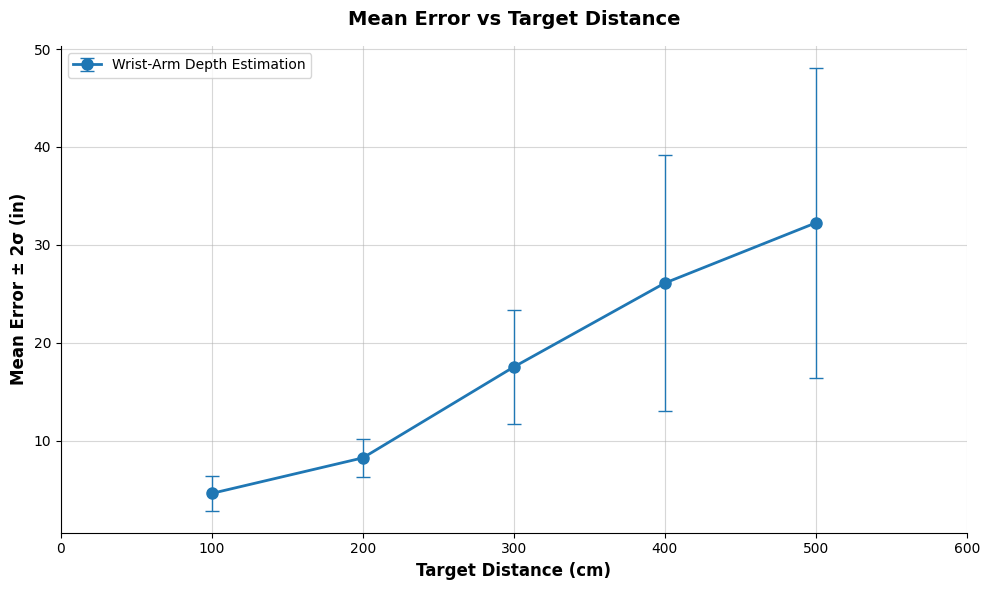

In [9]:
"""
WRIST-ARM DEPTH ESTIMATION
"""

# Define parameters
participants = ['frank', 'asha', 'sanat']
target_dist = [100, 200, 300, 400, 500] 
trial = 'VIS_Kalibr_wrist_arm_estimation'
box = '080'

# Get data
kalibr_wrist_arm_data_cm, kalibr_wrist_arm_data_in = get_data(participants, target_dist, trial, box, base_path)

# Calculate error metrics
kalibr_wrist_arm_metrics = calc_error_metrics(kalibr_wrist_arm_data_in, z_threshold=2)

# Plot mean errors
my_fig = plot_mean_errors(kalibr_wrist_arm_metrics['dists'], 
                          kalibr_wrist_arm_metrics['means'], 
                          kalibr_wrist_arm_metrics['stds'],
                          label='Wrist-Arm Depth Estimation')


<ErrorbarContainer object of 3 artists>

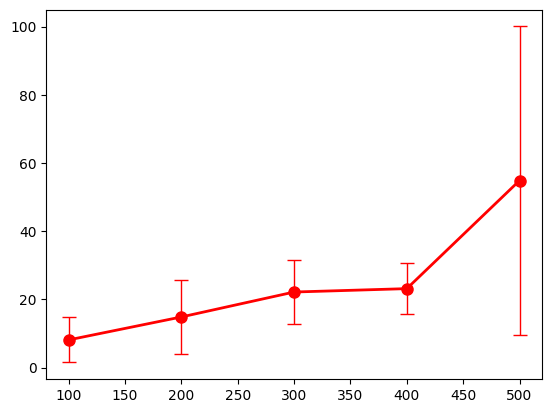

In [8]:
"""
HEIGHT DEPTH ESTIMATION
"""

# Define parameters
participants = ['frank', 'asha', 'sanat']
target_dist = [100, 200, 300, 400, 500] 
trial = 'VIS_Kalibr_height_estimation'
box = '080'

# Get data
kalibr_height_data_cm, kalibr_height_data_in = get_data(participants, target_dist, trial, box, base_path)

# Calculate error metrics
kalibr_height_metrics = calc_error_metrics(kalibr_height_data_in, z_threshold=2)

plt.errorbar(kalibr_height_metrics['dists'], kalibr_height_metrics['means'], yerr=kalibr_height_metrics['stds'], color='red', marker='o', markersize=8, 
                capsize=5, capthick=1, elinewidth=1, linestyle='-', linewidth=2,
                label='Height Depth Estimation')